In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import cv2
from dataset.translate import translate

: 

In [3]:
"""Знайшов на Kagle набір з 10 тваринок, длречі також 10 як і в завданню 1 з цифрами. 
Теоритично модна використати один з алгоритмів для аналізу картинки з таринками"""

# Шлях до датасету
data = "/Users/oleksandrnovokhatskyi/Documents/My_new_work/winstars_test/winstars_tests/task_2/dataset/raw-img"

In [4]:
# беремо одну папку, наприклад котів. Є переклад з італійської. Так мені повезло знайти італійський набір
folder = os.path.join(data, "gatto")

In [5]:
# перше зображення у цій папці
file = os.listdir(folder)[0]
path = os.path.join(folder, file)

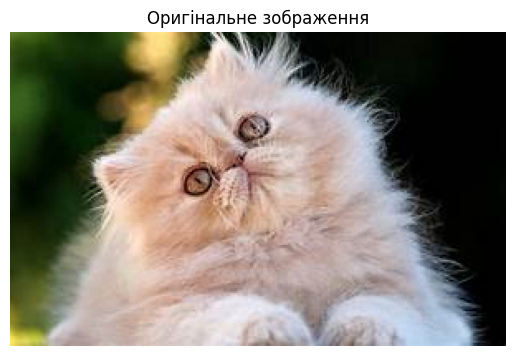

In [6]:
# читаємо і показуємо
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Оригінальне зображення")
plt.axis("off")
plt.show()

In [7]:
img.shape

(190, 300, 3)

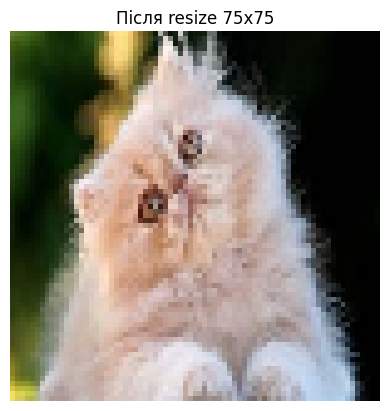

In [8]:
img_small = cv2.resize(img, (75, 75))

plt.imshow(img_small)
plt.title("Після resize 75x75")
plt.axis("off")
plt.show()

In [9]:
cl = os.listdir(data)
cl = [cls for cls in os.listdir(data) if not cls.startswith('.')]
classes = [translate.get(cls, cls) for cls in cl]
print("Перекладені назви:", classes)

Перекладені назви: ['chicken', 'ragno', 'cat', 'butterfly', 'cow', 'horse', 'dog', 'sheep', 'squirrel', 'elephant']


In [10]:
# Підраховуємо кількість зображень у кожній папці
class_counts = {classes[i]: len(os.listdir(os.path.join(data, cl[i])))
                for i in range(len(cl))}

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Images'])
df

,Class,Images
0,chicken,3098
1,ragno,4821
2,cat,1668
3,butterfly,2112
4,cow,1866
5,horse,2623
6,dog,4863
7,sheep,1820
8,squirrel,1862
9,elephant,1446


In [1]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Images', y='Class', data=df, palette='viridis')
plt.title('Кількість зображень у кожному класі', fontsize=14)
plt.xlabel('Кількість зображень')
plt.ylabel('Клас (тварина)')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined